In [1]:
# Switch to tensorflow 1.x
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import tensorflow as tf
from Compute_Jacobian import jacobian # Please download 'Compute_Jacobian.py' in the repository 
import numpy as np
import timeit
from scipy.interpolate import griddata
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
from pinn import PINN
from util import compute_ntk_eigenvalues

In [4]:
# Define solution and its Laplace
a = 4

def u(x, a):
  return np.sin(np.pi * a * x)

def u_xx(x, a):
  return -(np.pi * a)**2 * np.sin(np.pi * a * x)

In [5]:
# Define computional domain
bc1_coords = np.array([[0.0],
                       [0.0]])

bc2_coords = np.array([[1.0],
                       [1.0]])

dom_coords = np.array([[0.0],
                       [1.0]])

# Training data on u(x) -- Dirichlet boundary conditions

nn  = 100

X_bc1 = dom_coords[0, 0] * np.ones((nn // 2, 1))
X_bc2 = dom_coords[1, 0] * np.ones((nn // 2, 1))
X_u = np.vstack([X_bc1, X_bc2])
Y_u = u(X_u, a)

X_r = np.linspace(dom_coords[0, 0],
                  dom_coords[1, 0], nn)[:, None]
Y_r = u_xx(X_r, a)

In [6]:
# Define model
layers = [1, 512, 1]  
# layers = [1, 512, 512, 512, 1]  
model = PINN(layers, X_u, Y_u, X_r, Y_r)    



Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device





2023-03-21 14:35:39.723291: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-03-21 14:35:39.729457: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3393250000 Hz
2023-03-21 14:35:39.730091: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5563a40d4920 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-21 14:35:39.730130: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-03-21 14:35:39.732454: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-03-21 14:35:39.828814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-21 14:35:39.829570: 


random_normal/RandomStandardNormal: (RandomStandardNormal): /job:localhost/replica:0/task:0/device:CPU:0
random_normal/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
random_normal: (Add): /job:localhost/replica:0/task:0/device:CPU:0
mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
Variable: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
Variable/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
Variable/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_1/RandomStandardNormal: (RandomStandardNormal): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_1/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_1: (Add): /job:localhost/replica:0/task:0/device:CPU:0
Variable_1: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
Variable_1/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
Variable_1/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_2/Ra

2023-03-21 14:35:40.042945: I tensorflow/core/common_runtime/placer.cc:54] random_normal/RandomStandardNormal: (RandomStandardNormal): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.042977: I tensorflow/core/common_runtime/placer.cc:54] random_normal/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.042986: I tensorflow/core/common_runtime/placer.cc:54] random_normal: (Add): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.042994: I tensorflow/core/common_runtime/placer.cc:54] mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.043000: I tensorflow/core/common_runtime/placer.cc:54] Variable: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.043006: I tensorflow/core/common_runtime/placer.cc:54] Variable/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.043011: I tensorflow/core/common_runtime/placer.cc:54] Variable/read: (Identity): /job:lo

In [7]:
# Train model
model.train(nIter=40001, batch_size=100, log_NTK=True, log_weights=True)

random_normal/RandomStandardNormal: (RandomStandardNormal): /job:localhost/replica:0/task:0/device:CPU:0
random_normal/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
random_normal: (Add): /job:localhost/replica:0/task:0/device:CPU:0
mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
Variable: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
Variable/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
Variable/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_1/RandomStandardNormal: (RandomStandardNormal): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_1/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_1: (Add): /job:localhost/replica:0/task:0/device:CPU:0
Variable_1: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
Variable_1/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
Variable_1/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
random_normal_2/Ran

2023-03-21 14:35:40.862323: I tensorflow/core/common_runtime/placer.cc:54] random_normal/RandomStandardNormal: (RandomStandardNormal): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.862357: I tensorflow/core/common_runtime/placer.cc:54] random_normal/mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.862366: I tensorflow/core/common_runtime/placer.cc:54] random_normal: (Add): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.862374: I tensorflow/core/common_runtime/placer.cc:54] mul: (Mul): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.862380: I tensorflow/core/common_runtime/placer.cc:54] Variable: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.862388: I tensorflow/core/common_runtime/placer.cc:54] Variable/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
2023-03-21 14:35:40.862394: I tensorflow/core/common_runtime/placer.cc:54] Variable/read: (Identity): /job:lo

It: 0, Loss: 1.005e+04, Loss_bcs: 2.648e+00, Loss_res: 1.005e+04 ,Time: 0.16
Compute NTK...
Weights stored...
It: 100, Loss: 3.304e+02, Loss_bcs: 7.460e+01, Loss_res: 2.558e+02 ,Time: 0.45
Compute NTK...
Weights stored...
It: 200, Loss: 2.232e+02, Loss_bcs: 4.699e+01, Loss_res: 1.762e+02 ,Time: 0.22
Compute NTK...
Weights stored...
It: 300, Loss: 1.675e+02, Loss_bcs: 3.082e+01, Loss_res: 1.367e+02 ,Time: 0.22
Compute NTK...
Weights stored...
It: 400, Loss: 1.323e+02, Loss_bcs: 2.045e+01, Loss_res: 1.118e+02 ,Time: 0.24
Compute NTK...
Weights stored...
It: 500, Loss: 1.082e+02, Loss_bcs: 1.353e+01, Loss_res: 9.470e+01 ,Time: 0.21
Compute NTK...
Weights stored...
It: 600, Loss: 9.093e+01, Loss_bcs: 8.889e+00, Loss_res: 8.204e+01 ,Time: 0.20
Compute NTK...
Weights stored...
It: 700, Loss: 7.806e+01, Loss_bcs: 5.793e+00, Loss_res: 7.227e+01 ,Time: 0.23
Compute NTK...
Weights stored...
It: 800, Loss: 6.823e+01, Loss_bcs: 3.741e+00, Loss_res: 6.449e+01 ,Time: 0.23
Compute NTK...
Weights stor

**Training Loss**

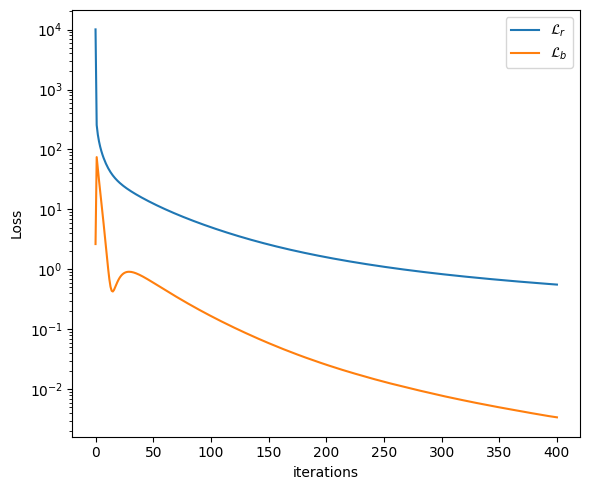

In [8]:
loss_bcs = model.loss_bcs_log
loss_res = model.loss_res_log

fig = plt.figure(figsize=(6,5))
plt.plot(loss_res, label='$\mathcal{L}_{r}$')
plt.plot(loss_bcs, label='$\mathcal{L}_{b}$')
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

**Model Prediction**

In [9]:
nn = 1000
X_star = np.linspace(dom_coords[0, 0], dom_coords[1, 0], nn)[:, None]
u_star = u(X_star, a)
r_star = u_xx(X_star, a)

# Predictions
u_pred = model.predict_u(X_star)
r_pred = model.predict_r(X_star)
error_u = np.linalg.norm(u_star - u_pred, 2) / np.linalg.norm(u_star, 2)
error_r = np.linalg.norm(r_star - r_pred, 2) / np.linalg.norm(r_star, 2)

print('Relative L2 error_u: {:.2e}'.format(error_u))
print('Relative L2 error_r: {:.2e}'.format(error_r))

Relative L2 error_u: 4.84e-02
Relative L2 error_r: 5.75e-03


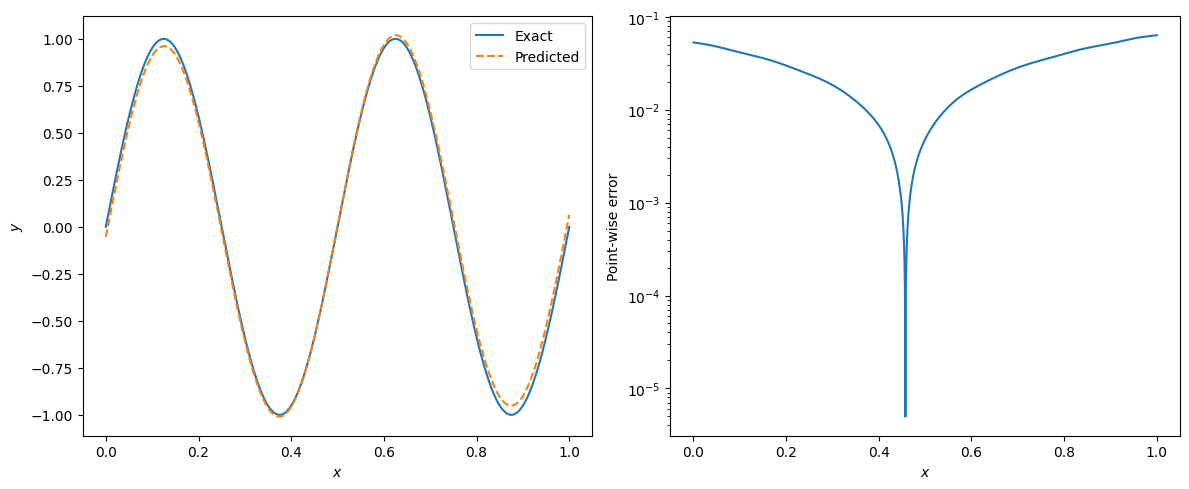

In [10]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(X_star, u_star, label='Exact')
plt.plot(X_star, u_pred, '--', label='Predicted')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(X_star, np.abs(u_star - u_pred), label='Error')
plt.yscale('log')
plt.xlabel('$x$')
plt.ylabel('Point-wise error')
plt.tight_layout()
plt.show()

**NTK Eigenvalues**

In [11]:
lambda_K_log, lambda_K_uu_log, lambda_K_rr_log, K_list = compute_ntk_eigenvalues(model)

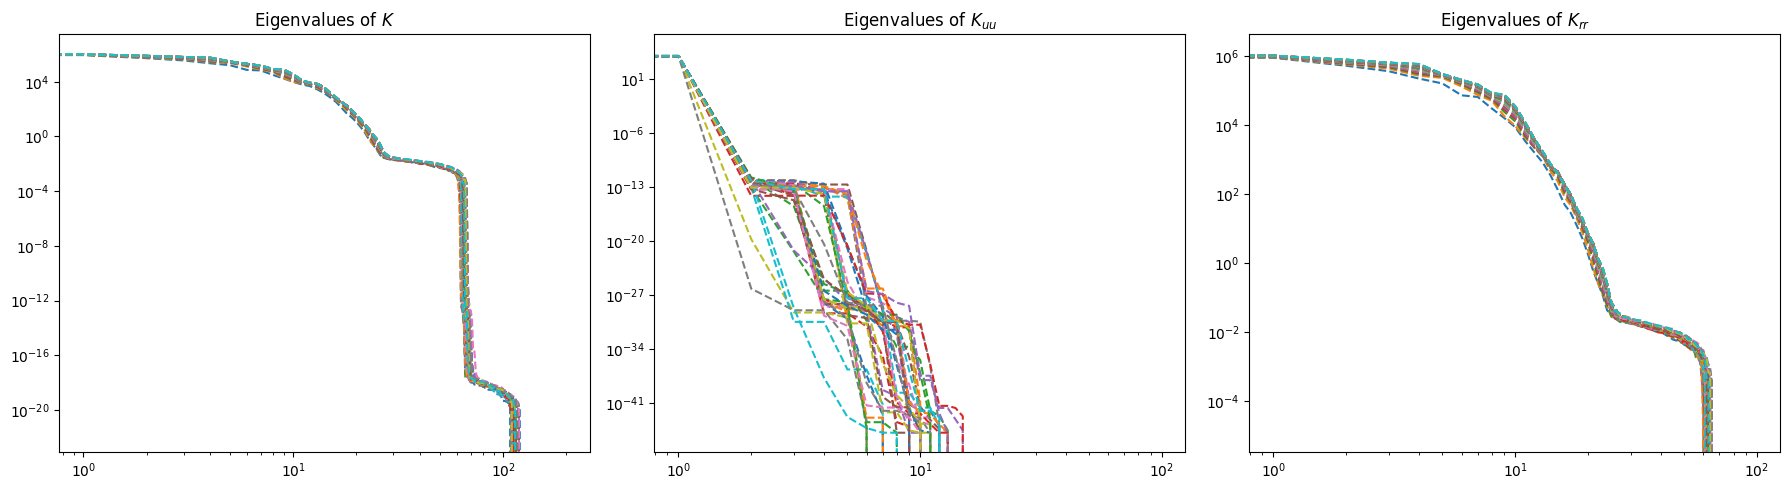

In [12]:
fig = plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
for i in range(1, len(lambda_K_log), 10):
    plt.plot(lambda_K_log[i], '--')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Eigenvalues of ${K}$')
plt.tight_layout()

plt.subplot(1,3,2)
for i in range(1, len(lambda_K_uu_log), 10):
    plt.plot(lambda_K_uu_log[i], '--')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Eigenvalues of ${K}_{uu}$')
plt.tight_layout()

plt.subplot(1,3,3)
for i in range(1, len(lambda_K_log), 10):
    plt.plot(lambda_K_rr_log[i], '--')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Eigenvalues of ${K}_{rr}$')
plt.tight_layout()
plt.show()

**Change of NTK**

In [13]:
# Change of the NTK
NTK_change_list = []
K0 = K_list[0]
for K in K_list:
    diff = np.linalg.norm(K - K0) / np.linalg.norm(K0) 
    NTK_change_list.append(diff)

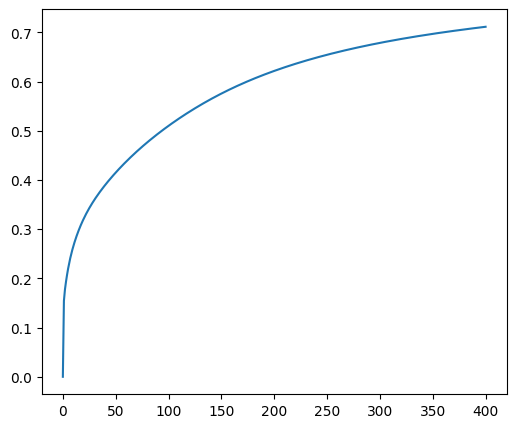

In [14]:
fig = plt.figure(figsize=(6,5))
plt.plot(NTK_change_list)


**Change of NN Params**

In [15]:
# Change of the weights and biases
def compute_weights_diff(weights_1, weights_2):
    weights = []
    N = len(weights_1)
    for k in range(N):
        weight = weights_1[k] - weights_2[k]
        weights.append(weight)
    return weights

def compute_weights_norm(weights, biases):
    norm = 0
    for w in weights:
        norm = norm + np.sum(np.square(w))
    for b in biases:
        norm = norm + np.sum(np.square(b))
    norm = np.sqrt(norm)
    return norm

# Restore the list weights and biases
weights_log = model.weights_log
biases_log = model.biases_log

weights_0 = weights_log[0]
biases_0 = biases_log[0]

# Norm of the weights at initialization
weights_init_norm = compute_weights_norm(weights_0, biases_0)

weights_change_list = []

N = len(weights_log)
for k in range(N):
    weights_diff = compute_weights_diff(weights_log[k], weights_log[0])
    biases_diff = compute_weights_diff(biases_log[k], biases_log[0])
    
    weights_diff_norm = compute_weights_norm(weights_diff, biases_diff)
    weights_change = weights_diff_norm / weights_init_norm
    weights_change_list.append(weights_change)

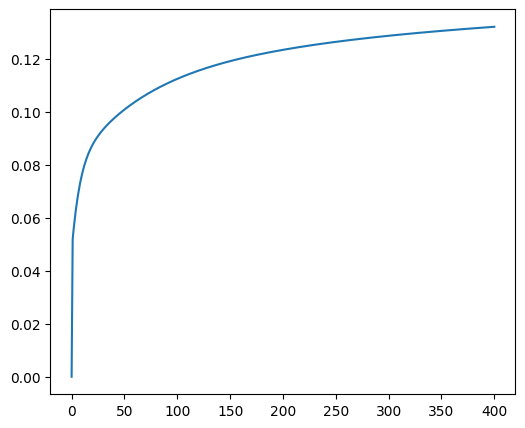

In [16]:
fig = plt.figure(figsize=(6,5))
plt.plot(weights_change_list)

In [54]:
print(np.max(lambda_K_log[-1]))
print(np.max(lambda_K_uu_log[-1]))
print(np.max(lambda_K_rr_log[-1]))

1204266.8
22987.162
1203136.5


In [53]:
from sklearn.metrics import r2_score

r2_score(u_star, u_pred)

0.9976594388020724